<a href="https://colab.research.google.com/github/sweena-mv/Task_Analytics_01/blob/main/HR_Analytics_g1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1103]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

import warnings # don't show warnings
warnings.filterwarnings("ignore")


Import datasets

In [1104]:
#Train set
trainset = pd.read_csv('aug_train.csv')
trainset2 = pd.read_csv('aug_train.csv')
#Test set
testset = pd.read_csv('aug_test.csv')


Basic analysis of training dataset

In [1105]:
#trainset.info()

In [1106]:
#testset.info()

In [1107]:
#check if we missed any null value check
#trainset.isnull().values.any()
#trainset.isna().sum()


In [1108]:
trainset.shape

(19158, 14)

In [1109]:
import matplotlib.pyplot as plt
import seaborn as sns
def nom_plot(nom_col):
    nom_data=trainset[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.title(nom_col)
    plt.bar(nom_data_counts.index,nom_data_counts)
    print('{}:\n{}'.format(nom_col,nom_data_counts))
    print('{}:\n{}'.format(nom_col,nom_data_counts/19158))
    plt.show()

target:
0.0    14381
1.0     4777
Name: target, dtype: int64
target:
0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


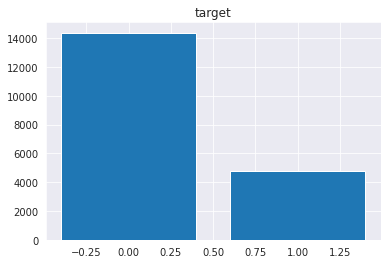

city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
city:
city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_121    0.000157
city_129    0.000157
city_111    0.000157
city_140    0.000052
city_171    0.000052
Name: city, Length: 123, dtype: float64


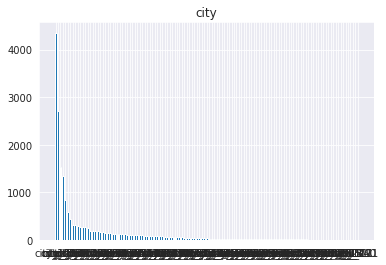

gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
gender:
Male      0.690103
Female    0.064621
Other     0.009970
Name: gender, dtype: float64


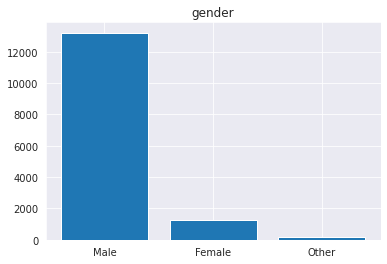

relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
relevent_experience:
Has relevent experience    0.719908
No relevent experience     0.280092
Name: relevent_experience, dtype: float64


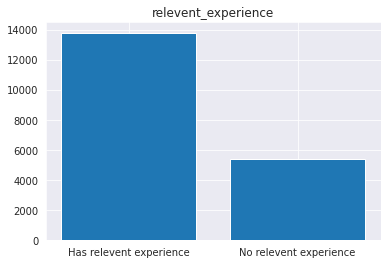

enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
enrolled_university:
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: enrolled_university, dtype: float64


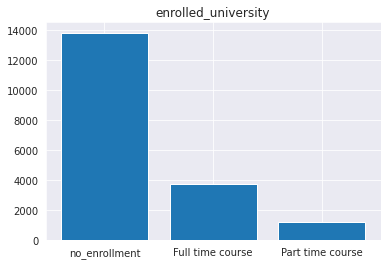

education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
education_level:
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64


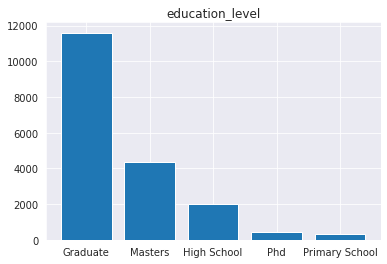

major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
major_discipline:
STEM               0.756446
Humanities         0.034920
Other              0.019887
Business Degree    0.017069
Arts               0.013206
No Major           0.011640
Name: major_discipline, dtype: float64


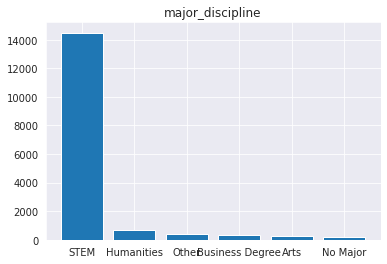

experience:
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
experience:
>20    0.171521
5      0.074642
4      0.073233
3      0.070675
6      0.063472
2      0.058827
7      0.053659
10     0.051415
9      0.051154
8      0.041862
15     0.035807
11     0.034659
14     0.030588
1      0.028656
<1     0.027247
16     0.026516
12     0.025786
13     0.020827
17     0.017852
19     0.015868
18     0.014615
20     0.007725
Name: experience, dtype: float64


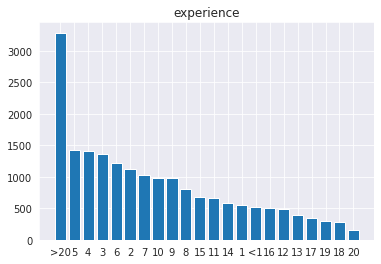

company_size:
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
company_size:
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64


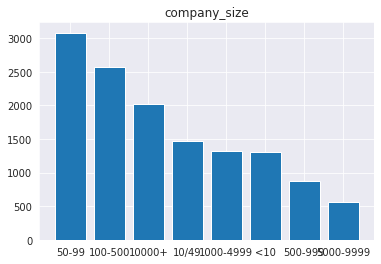

company_type:
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
company_type:
Pvt Ltd                0.512423
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64


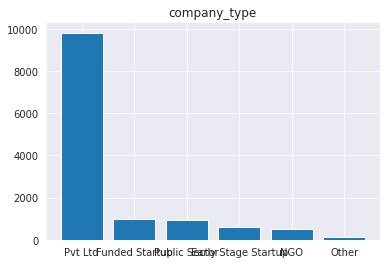

last_new_job:
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
last_new_job:
1        0.419668
>4       0.171730
2        0.151373
never    0.127988
4        0.053711
3        0.053450
Name: last_new_job, dtype: float64


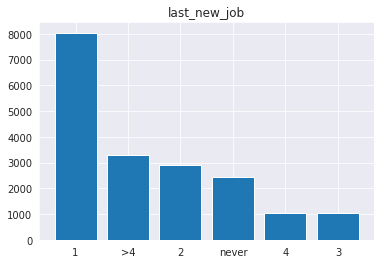

In [1110]:
nom=['target','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience',
    'company_size','company_type','last_new_job']
for i in nom:
    nom_plot(i)

Observations:
1. only 25% of Employee's who left is there in train set,the dataset is imbalanced.
     75 : 25 biased data.

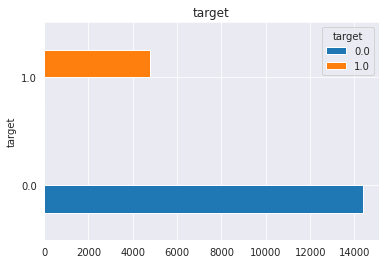

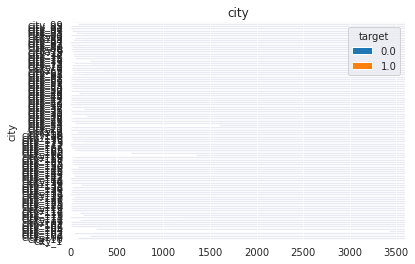

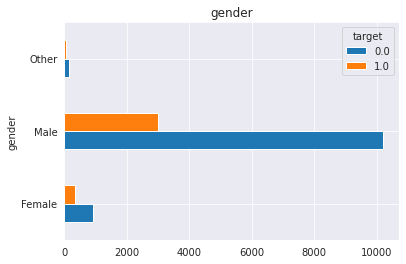

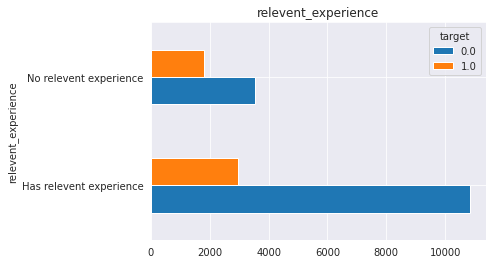

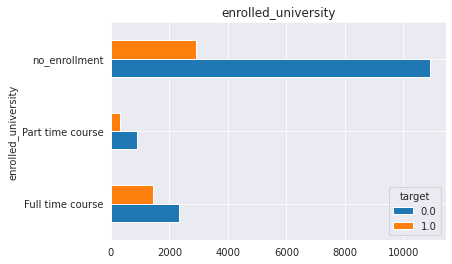

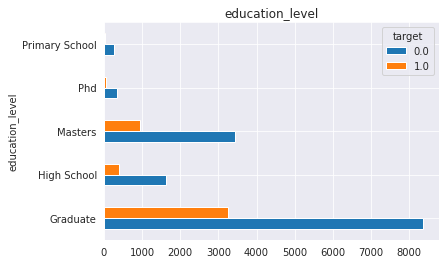

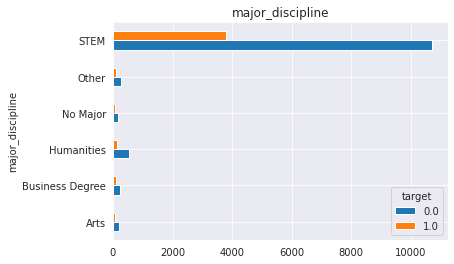

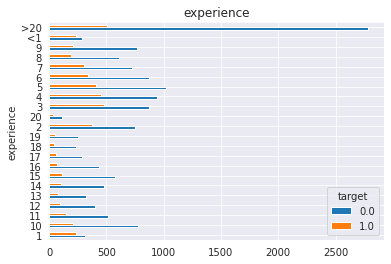

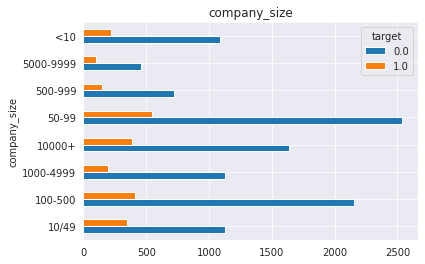

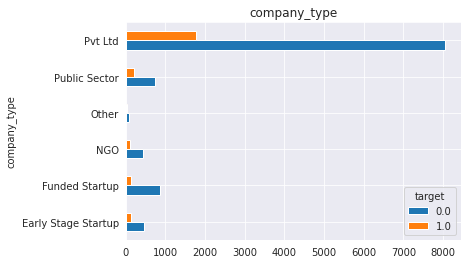

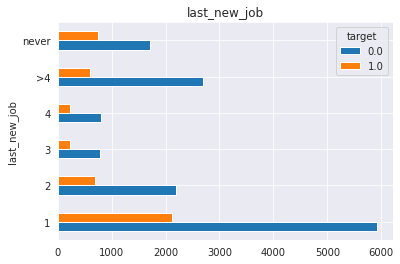

In [1111]:
def nom_compare(nom_col):
    pd.crosstab(trainset[nom_col],trainset['target']).plot(kind='barh')
    plt.title(nom_col)
    plt.show()
for i in nom:
    nom_compare(i)

2. People who have work experience under 10 years seems to have higher intended to resign.

In [1112]:
#Numeric variable
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(trainset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [1113]:
#Numerical int64/float type variables
num=['city_development_index','training_hours']

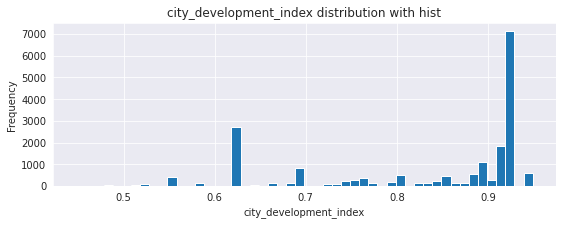

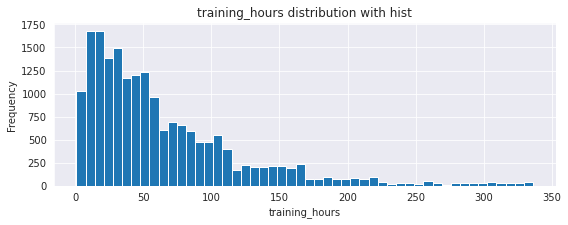

In [1114]:
for n in num:
    plot_hist(n)

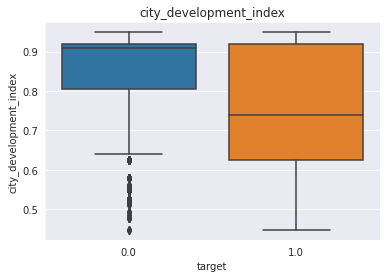

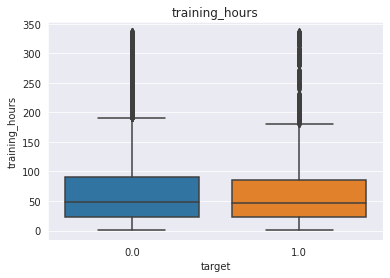

In [1115]:
def num_compare(num_col):
    sns.boxplot(data=trainset,x=trainset['target'],y=trainset[num_col])
    plt.title(num_col)
    plt.show()
for i in num:
    num_compare(i)

In [1116]:
trainset.shape

(19158, 14)

3.City development index is a important factor for an Employee to leave

4.Data to be made more readable format

In [1117]:
#trainset[["gender","target"]].groupby(["gender"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [1118]:
gender_map={
    'Male':0,
    'Female':1,
    'Other':2
}
relevent_experience_map={
    'No relevent experience':0,
    'Has relevent experience':1
}
enrolled_university_map={
    'no_enrollment':0,
    'Part time course':1,
    'Full time course':2
}
education_level_map={
    'Primary School':0,
    'High School':1,
    'Graduate':2,
    'Masters':3,
    'Phd':4
}
major_discipline_map={
    'STEM':0,
    'Other':1,
    'No Major':2,
    'Humanities':3,
    'Business Degree':4,
    'Arts':5
}

company_type_map={
    'Pvt Ltd':0,
    'Public Sector':1,
    'Other':2,
    'NGO':3,
    'Funded Startup':4,
    'Early Stage Startup':5
}
company_size_map={
    '<10':0,
    '10/49':1,
    '50-99':2,
    '100-500':3,
    '500-999':4,
    '1000-4999':5,
    '5000-9999':6,
    '10000+':7
}
last_new_job_map={
    'never':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '>4':5
}


experience_map={
    '<1':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    '11':11,
    '12':12,
    '13':13,
    '14':14,
    '15':15,
    '16':16,
    '17':17,
    '18':18,
    '19':19,
    '20':20,
    '>20':21
}

In [1119]:
#Label encoding
#trainset['gender']=trainset['gender'].map(gender_map)
trainset['education_level']=trainset['education_level'].map(education_level_map)
trainset['company_size']=trainset['company_size'].map(company_size_map)
trainset['last_new_job']=trainset['last_new_job'].map(last_new_job_map)
trainset['experience']=trainset['experience'].map(experience_map)

trainset['relevent_experience']=trainset['relevent_experience'].map(relevent_experience_map)
trainset['enrolled_university']=trainset['enrolled_university'].map(enrolled_university_map)
trainset['major_discipline']=trainset['major_discipline'].map(major_discipline_map)
trainset['company_type']=trainset['company_type'].map(company_type_map)


#Tried onehotencoder to check if its makes any diff in the accuracy.
#onehotencoder = OneHotEncoder()
#one_hot = ['gender']

#for i in range(0, len(one_hot)):
    #trainset[f'{one_hot[i]}'] = pd.Categorical(trainset[f'{one_hot[i]}'])
    #dummies = pd.get_dummies(trainset[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    #trainset.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    #trainset = pd.concat([trainset, dummies], axis=1)
    #trainset.drop("gender_encoded_Other", axis=1, inplace=True)

In [1120]:
#trainset

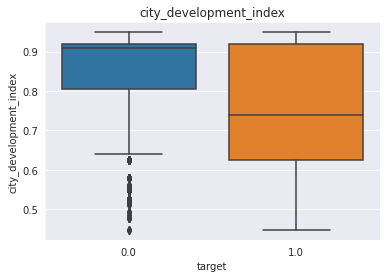

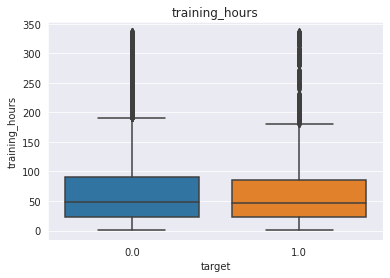

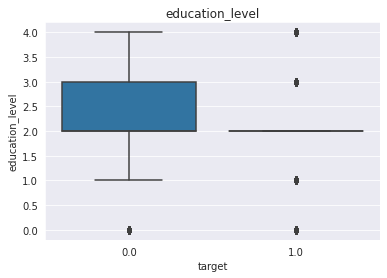

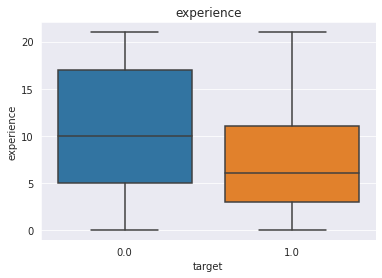

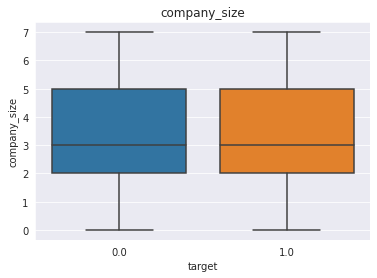

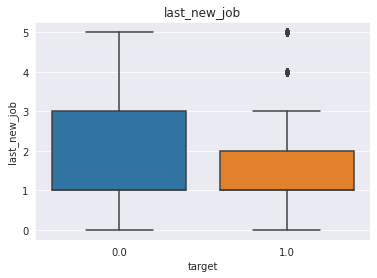

In [1121]:
num_2=['city_development_index','training_hours','education_level','experience','company_size','last_new_job']
for i in num_2:
    num_compare(i)

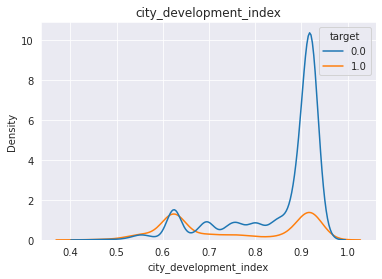

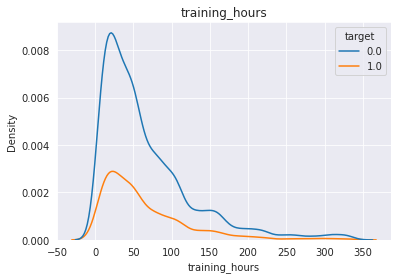

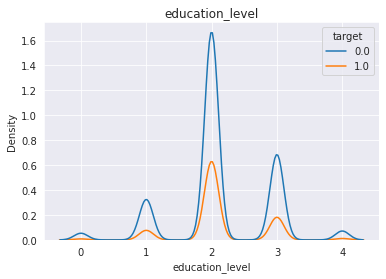

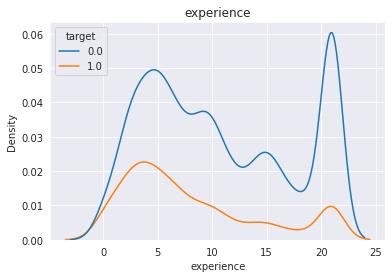

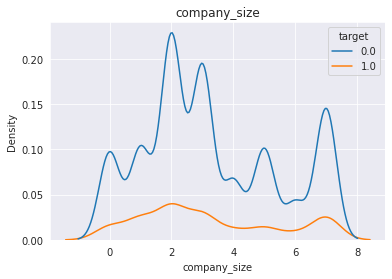

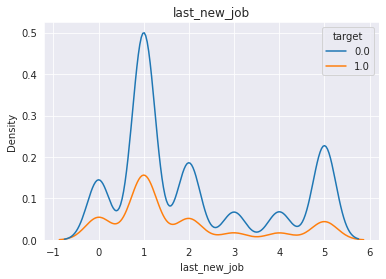

In [1122]:
def num_compare2(num_col):
    sns.kdeplot(data=trainset,x=trainset[num_col],hue=trainset['target'])
    plt.title(num_col)
    plt.show()
for i in num_2:
    num_compare2(i)

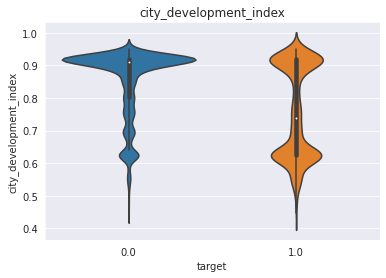

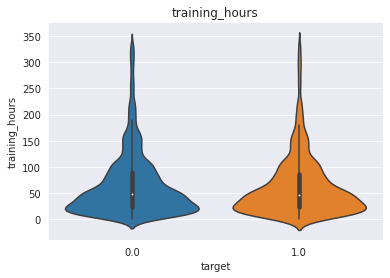

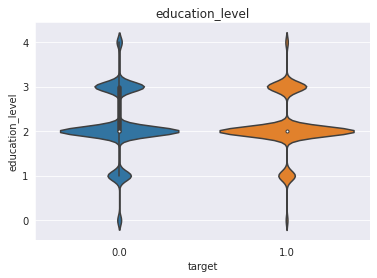

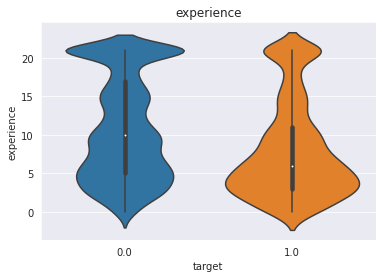

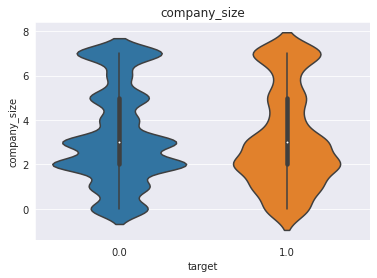

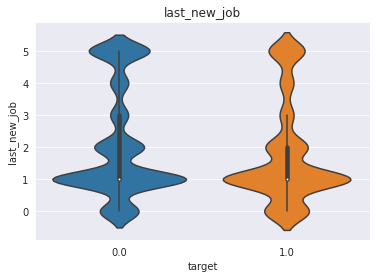

In [1123]:
#Using violinplot can more clearly show up the median(white dot).
def num_compare3(num_col):
    sns.violinplot(data=trainset,y=trainset[num_col],x=trainset['target'])
    plt.title(num_col)
    plt.show()
for i in num_2:
    num_compare3(i)

The reason employees quit seems to be because the city they live in does not have a high development index.

Most of these resigned employees have only 5 years or less of work experience.
However, people who have worked for more than 10 years are more inclined to keep their jobs.


Find coorelation

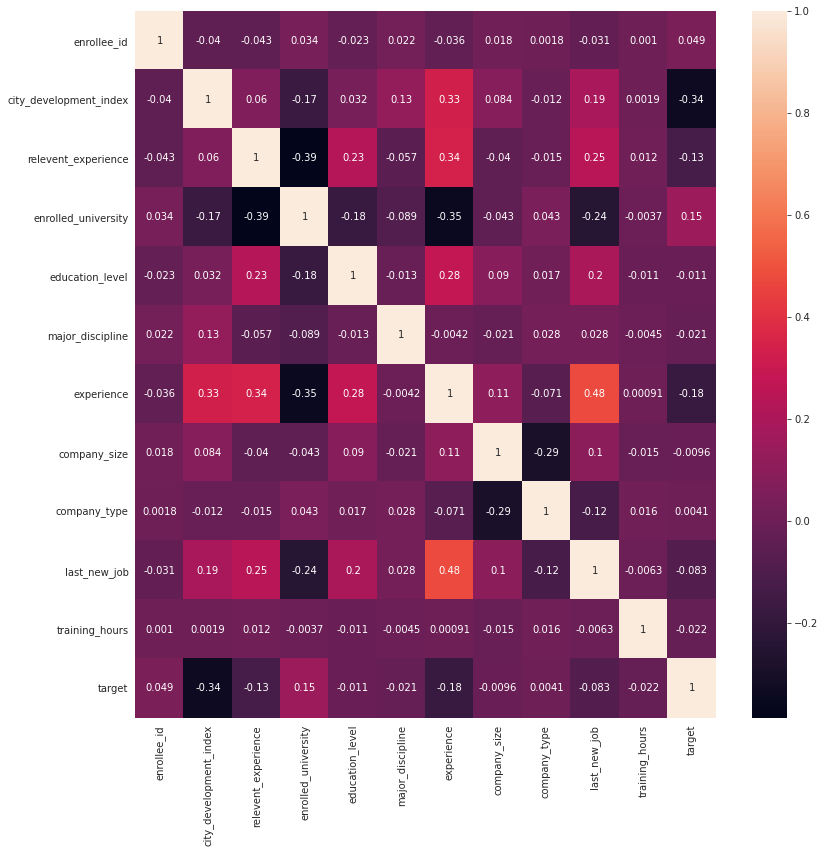

In [1124]:

#Plot the correlation using heatmap
fig,ax=plt.subplots(figsize=(13,13))
sns.heatmap(trainset.corr(),annot=True,ax=ax)
plt.show()

Data preprocessing
 
Data cleansing will do by combining both train and test dataset to maintain data consistancy

In [1125]:
## Set -1 as the target, and when we finish merging and label encoding, I will drop it out.
## Easy way to identify and seperate both dataset
testset['target'] = -1 
testset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,-1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,-1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,-1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,-1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,-1
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,-1
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,-1
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,-1


In [1126]:
##Combine these two DataFrame
dataset=pd.concat([trainset2,testset],axis=0).reset_index(drop=True)
#dataset

In [1127]:
#dataset.info()

Encoding categorical data

In [1128]:

from sklearn.preprocessing import LabelEncoder

dataset['gender']=dataset['gender'].map(gender_map)
dataset['education_level']=dataset['education_level'].map(education_level_map)
dataset['company_size']=dataset['company_size'].map(company_size_map)
dataset['last_new_job']=dataset['last_new_job'].map(last_new_job_map)
dataset['experience']=dataset['experience'].map(experience_map)
dataset['relevent_experience']=dataset['relevent_experience'].map(relevent_experience_map)
dataset['enrolled_university']=dataset['enrolled_university'].map(enrolled_university_map)
dataset['major_discipline']=dataset['major_discipline'].map(major_discipline_map)
dataset['company_type']=dataset['company_type'].map(company_type_map)

#city label encoing
city_encoder=LabelEncoder()
dataset.loc[:,'city']=city_encoder.fit_transform(dataset.loc[:,'city'])
dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15,-1.0
21283,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30,-1.0
21284,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18,-1.0
21285,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84,-1.0


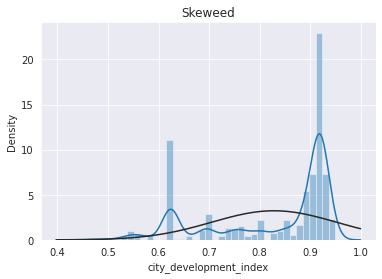

mu city_development_index : 0.8284615023253629, sigma city_development_index : 0.12353364398830374



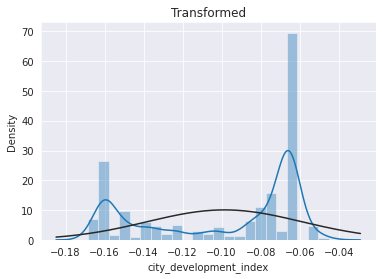

mu city_development_index : -0.0985138541598855, sigma city_development_index : 0.039616153009020764



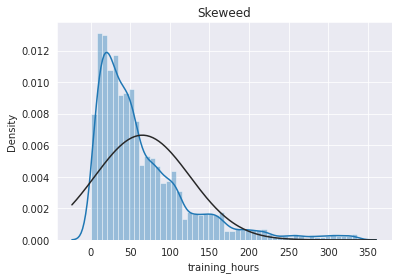

mu training_hours : 65.32851035843473, sigma training_hours : 60.07378987977419



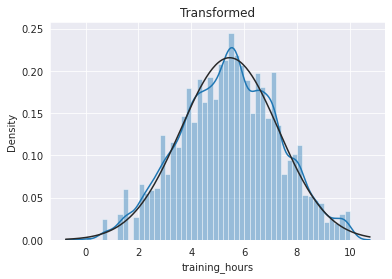

mu training_hours : 5.450049758915268, sigma training_hours : 1.8510544548271717



In [1129]:
skews=['city_development_index','training_hours']
from scipy.stats import norm, skew, boxcox
for i in skews:
    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Skeweed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    dataset[i], lam = boxcox(dataset[i])

    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Transformed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

Seperate Training and Test set

In [1130]:

trainset=dataset[dataset['target']!=-1].reset_index(drop=True) 
testset=dataset[dataset['target']==-1].reset_index(drop=True) 

testset=testset.drop(['target'],axis=1) 
trainset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,-0.065919,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,4.957746,1.0
1,29725,77,-0.131833,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,5.463703,0.0
2,11561,64,-0.159528,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,6.623757,0.0
3,33241,14,-0.127901,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,5.661705,1.0
4,666,50,-0.134374,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,2.500811,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,-0.090952,0.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,5.247426,1.0
19154,31398,5,-0.065919,0.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,5.661705,1.0
19155,24576,5,-0.065919,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,5.336368,0.0
19156,5756,94,-0.123639,0.0,1,0.0,1.0,NaN,0.0,4.0,0.0,2.0,6.962068,0.0


In [1131]:
#testset

In [1132]:
trainset.shape

(19158, 14)

Missing value replacement before training

In [1133]:
print(trainset.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [1134]:
trainset.isna().sum()
#testset.isna().sum()
#replacing null values with mean
trainset['gender'].fillna(value=-1,inplace=True)
trainset['major_discipline'].fillna(value=-1,inplace=True)
trainset['company_size'].fillna(value=-1,inplace=True) 
trainset['company_type'].fillna(value=-1,inplace=True)
trainset.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],axis=0,inplace=True)



In [1135]:
trainset.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [1136]:
#Splitting training and test set for model training
X=trainset.iloc[:,1:13]
y=trainset.iloc[:,13]

In [1023]:
#Plot the correlation using heatmap
#fig,ax=plt.subplots(figsize=(13,13))
#sns.heatmap(trainset.corr(),annot=True,ax=ax)
#plt.show()

In [1024]:
#dropping less coorelated features and training
#X=X.drop(['major_discipline'],axis=1)
#X=X.drop(['gender'],axis=1)

In [1137]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(testset))

X_train 14411
X_test 3603
y_train 14411
y_test 3603
test 2129


In [1138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

In [1027]:
#X_train

In [1028]:
#apply feature scaling to city, city index,training hours
#num_cols= ['city_development_index' ,'training_hours']
#ss= StandardScaler()
#X_train[num_cols]= ss.fit_transform(X_train[num_cols])
#X_test[num_cols]= ss.transform(X_test[num_cols])
# 0.7957446808510639


In [1139]:
# model accuracy
result = []

In [1140]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)

RESULT
XGBoost Model Acc :  0.7601998334721066


In [1141]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
result.append(acc_random_knn)
print("RESULT")
print("KNN Model Acc : ",acc_random_knn)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   38.5s finished


RESULT
KNN Model Acc :  0.768248681654177


In [1142]:

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
result.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)

RESULT
SVM Model Acc :  0.7463225090202609


In [1143]:
#random_forest_model = RandomForestClassifier(n_estimators=99,criterion='entropy',max_depth=7, random_state= 55)
#  0.7869565217391304
#random_forest_model = RandomForestClassifier(n_estimators=82,criterion='entropy',max_depth=7, random_state= 55)
# 0.788985507246376
#random_forest_model =RandomForestClassifier(n_estimators=742,max_depth=9,random_state=111)
#random_forest_model = RandomForestClassifier(n_estimators=576,criterion='entropy',max_depth=12, random_state= 18)
#0.7946155981126839

random_forest_model = RandomForestClassifier(n_estimators=432,criterion='entropy',max_depth=13, random_state= 15)
#0.7951706910907577



random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print(cm_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)


[[2349  398]
 [ 340  516]]
RESULT
Random Forest Model Acc :  0.7951706910907577


In [1144]:
results = pd.DataFrame({"Model Result":result, 
                        "Models":["XGBoost",
                                  "KNN", 
                                  "SVM",
                                  "RandomForest"]})
results

,Model Result,Models
0,0.760200,XGBoost
1,0.768249,KNN
2,0.746323,SVM
3,0.795171,RandomForest


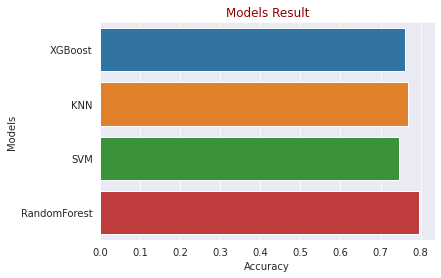

In [1145]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

In [1146]:
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV

k=StratifiedKFold(n_splits=5,shuffle=True)
rfc_params={
    'randomforestclassifier__n_estimators':randint(1,1000),
    'randomforestclassifier__max_depth':randint(3,20),
    'randomforestclassifier__min_samples_leaf':randint(1,100)
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=111)
smote_rfc_pipe=make_pipeline(StandardScaler(),RandomForestClassifier())

rfc_smote_optimal=RandomizedSearchCV(smote_rfc_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_smote_optimal.fit(X_train,y_train)
print(rfc_smote_optimal.best_params_)
print(rfc_smote_optimal.best_score_)


{'randomforestclassifier__max_depth': 11, 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__n_estimators': 698}
0.8053035664467496


In [ ]:
testset['gender'].fillna(value=-1,inplace=True)
testset['major_discipline'].fillna(value=-1,inplace=True)
testset['company_size'].fillna(value=-1,inplace=True) 
testset['company_type'].fillna(value=-1,inplace=True)
testset.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],axis=0,inplace=True)
testset.info()

In [1148]:
X_testset = testset.drop(labels = "enrollee_id", axis = 1)
#predict=random_forest_model.predict(X_testset)
predict=random_forest_model.predict_proba(testset.drop(['enrollee_id'],axis=1))[:,1]
submission=pd.DataFrame({'enrollee_id':testset['enrollee_id'],
                      'target':predict})
submission

,enrollee_id,target
0,32403,0.123254
1,9858,0.284388
2,31806,0.389841
3,27385,0.058685
4,27724,0.079163
...,...,...
2124,1289,0.245580
2125,195,0.095441
2126,31762,0.029182
2127,7873,0.128565


In [1149]:
submission.to_csv('submission.csv',index=False)